<a href="https://colab.research.google.com/github/yl13340-dev/Data-Science-Bootcamp-Section-1-/blob/main/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd

# This will open a file selection dialog.
df = pd.read_csv("../data/sentimentdataset_cleaned.csv")




Alternatively, if your data is on Google Drive, you can mount your Drive and access files directly:


In [9]:
import pandas as pd


# 1. 讀取資料



# 2. 篩選歐洲國家 (這裡先假設 United Kingdom, France, Germany, Italy, Spain 等)
print(df["Country"].unique())

europe_countries = ["United Kingdom", "France", "Greece", "Sweden", "Italy", "Netherlands", "Germany", "Italy", "Spain", "Portugal", "Switzerland", "Austria", "Belgium", "Denmark", "Czech Republic", "Norway", "Ireland", "Scotland"]
df_europe = df[df["Country"].isin(europe_countries)]
# 3. 檢查基本統計
print("歐洲樣本數:", len(df_europe))
print(df_europe[["Retweets","Likes"]].describe())

# 4. 分析特徵與互動的平均值
features = ["Platform","Sentiment","hashtag_count","emoji_count","LengthGroup"]

for col in features:
    summary = df_europe.groupby(col)[["Retweets","Likes"]].mean().reset_index()
    print(f"\n平均互動依據 {col}:")
    print(summary)

# 5. 如果要看相關性
corr = df_europe[["Retweets","Likes","hashtag_count","emoji_count","text_len","word_count"]].corr()
print("\n相關性矩陣:")
print(corr)

['Usa' 'Canada' 'United Kingdom' 'Australia' 'India' 'France' 'Brazil'
 'Japan' 'Greece' 'Germany' 'Sweden' 'Italy' 'Netherlands' 'South Africa'
 'Spain' 'Portugal' 'Switzerland' 'Austria' 'Belgium' 'Denmark'
 'Czech Republic' 'Jordan' 'Peru' 'Maldives' 'China' 'Cambodia' 'Norway'
 'Colombia' 'Ireland' 'Jamaica' 'Kenya' 'Scotland' 'Thailand']
歐洲樣本數: 217
         Retweets       Likes
count  217.000000  217.000000
mean    21.714286   43.211982
std      6.200465   12.351010
min      7.000000   15.000000
25%     18.000000   35.000000
50%     22.000000   45.000000
75%     28.000000   55.000000
max     35.000000   70.000000

平均互動依據 Platform:
    Platform   Retweets      Likes
0   Facebook  21.348485  42.621212
1  Instagram  22.918919  45.689189
2    Twitter  20.870130  41.337662

平均互動依據 Sentiment:
                  Sentiment  Retweets  Likes
0          Acceptance            15.0   30.0
1           Accomplishment       28.0   55.0
2             Adoration          22.0   45.0
3           Adren

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


# 2. 載入 pandas
import pandas as pd

# 3. 讀取 CSV 檔案

# 4. 確認欄位
print(df.columns)
df.head()



# 建立二元標籤 (High=1, Low=0)
ret_mean = df["Retweets"].mean()
like_mean = df["Likes"].mean()
df["Retweets_bin"] = (df["Retweets"] >= ret_mean).astype(int)
df["Likes_bin"] = (df["Likes"] >= like_mean).astype(int)

# 特徵 (Text, Hashtags, SentimentSimple, Month, emoji_count)
X = df[["Text", "Hashtags", "SentimentSimple", "Month", "emoji_count"]]

# 前處理：文字用 TF-IDF，類別用 OneHot，數值型 (emoji_count) 用 StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ("text", TfidfVectorizer(max_features=500), "Text"),
        ("hashtags", TfidfVectorizer(max_features=200), "Hashtags"),
        ("sentiment", OneHotEncoder(handle_unknown="ignore"), ["SentimentSimple"]),
        ("month", OneHotEncoder(handle_unknown="ignore"), ["Month"]),
        ("emoji", StandardScaler(), ["emoji_count"])
    ]
)

# Logistic Regression pipeline
log_reg = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

# 訓練 & 評估 Retweets 高低
X_train, X_test, y_train, y_test = train_test_split(X, df["Retweets_bin"], test_size=0.2, random_state=42)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print("Retweets classification report:\n", classification_report(y_test, y_pred))

# 訓練 & 評估 Likes 高低
X_train, X_test, y_train, y_test = train_test_split(X, df["Likes_bin"], test_size=0.2, random_state=42)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print("Likes classification report:\n", classification_report(y_test, y_pred))

Index(['Id', 'Text', 'Sentiment', 'Timestamp', 'User', 'Platform', 'Hashtags',
       'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day', 'Hour',
       'text_len', 'word_count', 'hashtag_count', 'emoji_count',
       'SentimentSimple', 'Sentiment_norm', 'TextLength', 'LengthGroup'],
      dtype='object')
Retweets classification report:
               precision    recall  f1-score   support

           0       0.67      0.66      0.66        67
           1       0.72      0.72      0.72        80

    accuracy                           0.69       147
   macro avg       0.69      0.69      0.69       147
weighted avg       0.69      0.69      0.69       147

Likes classification report:
               precision    recall  f1-score   support

           0       0.65      0.70      0.67        66
           1       0.74      0.69      0.71        81

    accuracy                           0.69       147
   macro avg       0.69      0.69      0.69       147
weighted avg       0.70    

In [13]:
# 1. 匯入套件
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# 2. 讀取 CSV 檔案

# 3. 建立二元標籤 (High=1, Low=0)
ret_mean = df["Retweets"].mean()
like_mean = df["Likes"].mean()
df["Retweets_bin"] = (df["Retweets"] >= ret_mean).astype(int)
df["Likes_bin"] = (df["Likes"] >= like_mean).astype(int)

# 4. 特徵欄位
X = df[["Text", "Hashtags", "SentimentSimple", "Month", "emoji_count"]]

# 5. 前處理：文字用 TF-IDF，類別用 OneHot，數值型用 StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ("text", TfidfVectorizer(max_features=500), "Text"),
        ("hashtags", TfidfVectorizer(max_features=200), "Hashtags"),
        ("sentiment", OneHotEncoder(handle_unknown="ignore"), ["SentimentSimple"]),
        ("month", OneHotEncoder(handle_unknown="ignore"), ["Month"]),
        ("emoji", StandardScaler(), ["emoji_count"])
    ]
)

# 6. 建立兩個 Logistic Regression pipeline
log_reg_ret = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

log_reg_like = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

# 7. 訓練 & 評估 Retweets 模型
X_train, X_test, y_train, y_test = train_test_split(X, df["Retweets_bin"], test_size=0.2, random_state=42)
log_reg_ret.fit(X_train, y_train)
y_pred = log_reg_ret.predict(X_test)
print("Retweets classification report:\n", classification_report(y_test, y_pred))
print("Retweets confusion matrix:\n", confusion_matrix(y_test, y_pred))

# 8. 訓練 & 評估 Likes 模型
X_train, X_test, y_train, y_test = train_test_split(X, df["Likes_bin"], test_size=0.2, random_state=42)
log_reg_like.fit(X_train, y_train)
y_pred = log_reg_like.predict(X_test)
print("Likes classification report:\n", classification_report(y_test, y_pred))
print("Likes confusion matrix:\n", confusion_matrix(y_test, y_pred))

Retweets classification report:
               precision    recall  f1-score   support

           0       0.67      0.66      0.66        67
           1       0.72      0.72      0.72        80

    accuracy                           0.69       147
   macro avg       0.69      0.69      0.69       147
weighted avg       0.69      0.69      0.69       147

Retweets confusion matrix:
 [[44 23]
 [22 58]]
Likes classification report:
               precision    recall  f1-score   support

           0       0.65      0.70      0.67        66
           1       0.74      0.69      0.71        81

    accuracy                           0.69       147
   macro avg       0.69      0.69      0.69       147
weighted avg       0.70      0.69      0.69       147

Likes confusion matrix:
 [[46 20]
 [25 56]]


In [14]:
# 假設歐洲國家名單 (你可以依資料集調整)
europe_countries = ["United Kingdom", "France", "Greece", "Sweden", "Italy", "Netherlands", "Germany", "Italy", "Spain", "Portugal", "Switzerland", "Austria", "Belgium", "Denmark", "Czech Republic", "Norway", "Ireland", "Scotland"]
# 篩選歐洲樣本
df_europe = df[df["Country"].isin(europe_countries)]

# 建立二元標籤 (High=1, Low=0)
ret_mean = df_europe["Retweets"].mean()
like_mean = df_europe["Likes"].mean()
df_europe["Retweets_bin"] = (df_europe["Retweets"] >= ret_mean).astype(int)
df_europe["Likes_bin"] = (df_europe["Likes"] >= like_mean).astype(int)

# 特徵
X = df_europe[["Text", "Hashtags", "SentimentSimple", "Month", "emoji_count"]]

# 前處理
preprocessor = ColumnTransformer(
    transformers=[
        ("text", TfidfVectorizer(max_features=500), "Text"),
        ("hashtags", TfidfVectorizer(max_features=200), "Hashtags"),
        ("sentiment", OneHotEncoder(handle_unknown="ignore"), ["SentimentSimple"]),
        ("month", OneHotEncoder(handle_unknown="ignore"), ["Month"]),
        ("emoji", StandardScaler(), ["emoji_count"])
    ]
)

# 建立 pipeline
log_reg_ret = Pipeline(steps=[("preprocess", preprocessor),
                              ("classifier", LogisticRegression(max_iter=1000))])

log_reg_like = Pipeline(steps=[("preprocess", preprocessor),
                               ("classifier", LogisticRegression(max_iter=1000))])

# 訓練 & 評估 Retweets 模型 (歐洲樣本)
X_train, X_test, y_train, y_test = train_test_split(X, df_europe["Retweets_bin"], test_size=0.2, random_state=42)
log_reg_ret.fit(X_train, y_train)
y_pred = log_reg_ret.predict(X_test)
print("Retweets classification report (Europe):\n", classification_report(y_test, y_pred))

# 訓練 & 評估 Likes 模型 (歐洲樣本)
X_train, X_test, y_train, y_test = train_test_split(X, df_europe["Likes_bin"], test_size=0.2, random_state=42)
log_reg_like.fit(X_train, y_train)
y_pred = log_reg_like.predict(X_test)
print("Likes classification report (Europe):\n", classification_report(y_test, y_pred))

Retweets classification report (Europe):
               precision    recall  f1-score   support

           0       0.74      0.61      0.67        23
           1       0.64      0.76      0.70        21

    accuracy                           0.68        44
   macro avg       0.69      0.69      0.68        44
weighted avg       0.69      0.68      0.68        44

Likes classification report (Europe):
               precision    recall  f1-score   support

           0       0.76      0.64      0.70        25
           1       0.61      0.74      0.67        19

    accuracy                           0.68        44
   macro avg       0.69      0.69      0.68        44
weighted avg       0.70      0.68      0.68        44



/var/folders/s7/q7s5zs7x7xs6zxtqrzr8b8b40000gn/T/ipykernel_21391/1169403779.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_europe["Retweets_bin"] = (df_europe["Retweets"] >= ret_mean).astype(int)
/var/folders/s7/q7s5zs7x7xs6zxtqrzr8b8b40000gn/T/ipykernel_21391/1169403779.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_europe["Likes_bin"] = (df_europe["Likes"] >= like_mean).astype(int)


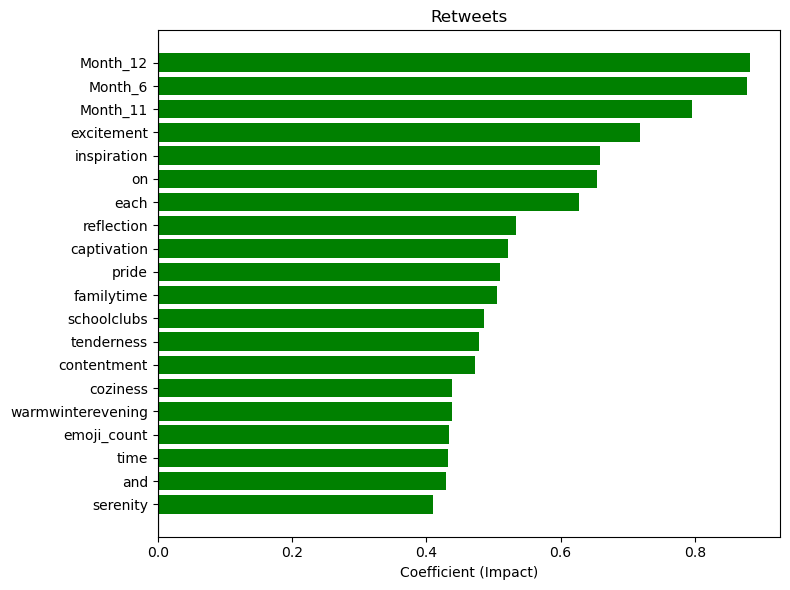


Top 20 features influencing Retweets:
Month_12: 0.883
Month_6: 0.878
Month_11: 0.796
excitement: 0.718
inspiration: 0.659
on: 0.654
each: 0.627
reflection: 0.534
captivation: 0.522
pride: 0.509
familytime: 0.506
schoolclubs: 0.486
tenderness: 0.478
contentment: 0.473
coziness: 0.438
warmwinterevening: 0.438
emoji_count: 0.434
time: 0.432
and: 0.429
serenity: 0.411


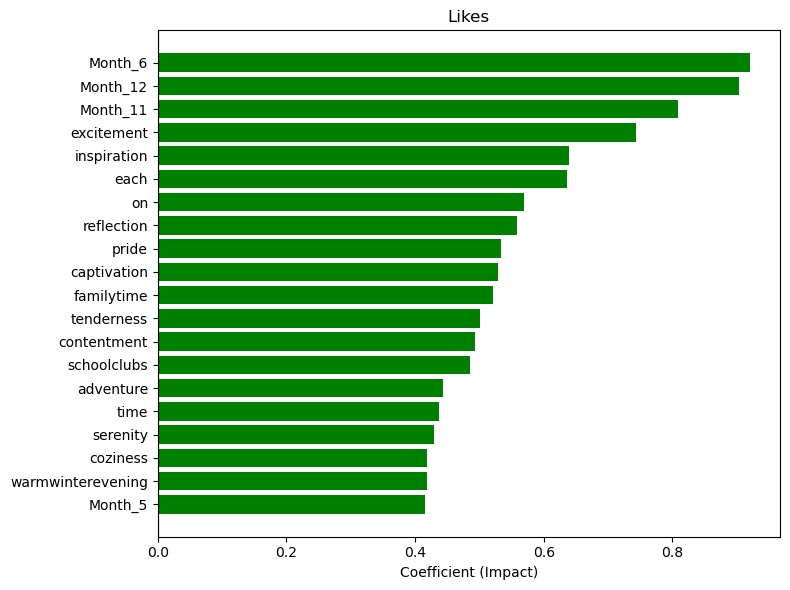


Top 20 features influencing Likes:
Month_6: 0.921
Month_12: 0.904
Month_11: 0.809
excitement: 0.744
inspiration: 0.640
each: 0.637
on: 0.569
reflection: 0.558
pride: 0.534
captivation: 0.529
familytime: 0.521
tenderness: 0.501
contentment: 0.493
schoolclubs: 0.486
adventure: 0.443
time: 0.437
serenity: 0.429
coziness: 0.418
warmwinterevening: 0.418
Month_5: 0.416


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 取得完整特徵名稱
feature_names = []
feature_names.extend(preprocessor.named_transformers_["text"].get_feature_names_out())
feature_names.extend(preprocessor.named_transformers_["hashtags"].get_feature_names_out())
feature_names.extend(preprocessor.named_transformers_["sentiment"].get_feature_names_out(["SentimentSimple"]))
feature_names.extend(preprocessor.named_transformers_["month"].get_feature_names_out(["Month"]))
feature_names.append("emoji_count")

def plot_sorted_features(model, feature_names, title, top_n=20):
    # 取出係數
    coef = model.named_steps["classifier"].coef_[0]
    df = pd.DataFrame({"Feature": feature_names, "Coefficient": coef})

    # 依照數值大小排序 (由正到負)
    df = df.sort_values("Coefficient", ascending=False).head(top_n)

    # 顏色：正值綠色，負值紅色
    colors = df["Coefficient"].apply(lambda x: "green" if x > 0 else "red")

    # 繪圖
    plt.figure(figsize=(8,6))
    plt.barh(df["Feature"], df["Coefficient"], color=colors)
    plt.axvline(0, color="black", linewidth=0.8)
    plt.title(title)
    plt.xlabel("Coefficient (Impact)")
    plt.gca().invert_yaxis()  # 讓最大值在上方
    plt.tight_layout()
    plt.show()

    # 印出排序結果
    print(f"\nTop {top_n} features influencing {title}:")
    for i, row in df.iterrows():
        print(f"{row['Feature']}: {row['Coefficient']:.3f}")

# 繪製 Retweets 特徵影響
plot_sorted_features(log_reg_ret, feature_names, "Retweets", top_n=20)

# 繪製 Likes 特徵影響
plot_sorted_features(log_reg_like, feature_names, "Likes", top_n=20)

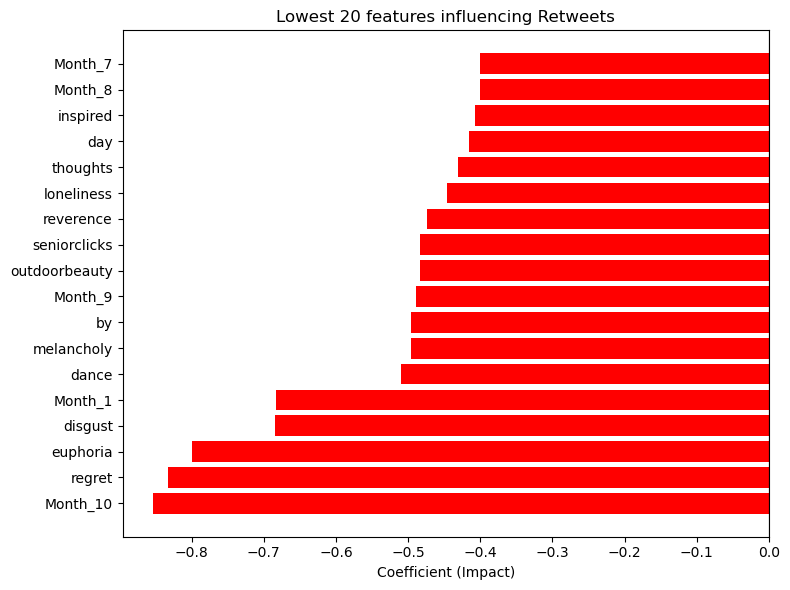


Lowest 20 features influencing Retweets:
Month_10: -0.853
regret: -0.833
euphoria: -0.800
disgust: -0.684
Month_1: -0.683
dance: -0.509
melancholy: -0.497
by: -0.496
Month_9: -0.489
outdoorbeauty: -0.484
seniorclicks: -0.484
reverence: -0.473
loneliness: -0.447
euphoria: -0.440
thoughts: -0.430
day: -0.416
inspired: -0.408
loneliness: -0.400
Month_8: -0.400
Month_7: -0.400


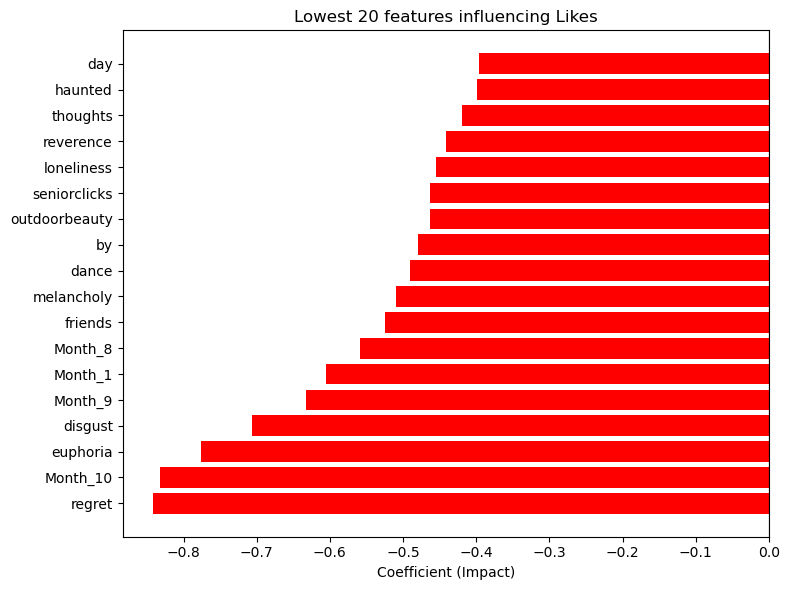


Lowest 20 features influencing Likes:
regret: -0.841
Month_10: -0.832
euphoria: -0.776
disgust: -0.707
Month_9: -0.632
Month_1: -0.605
Month_8: -0.559
friends: -0.525
melancholy: -0.509
dance: -0.491
by: -0.480
outdoorbeauty: -0.463
seniorclicks: -0.463
loneliness: -0.455
reverence: -0.441
euphoria: -0.426
thoughts: -0.419
loneliness: -0.407
haunted: -0.398
day: -0.396


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 取得完整特徵名稱
feature_names = []
feature_names.extend(preprocessor.named_transformers_["text"].get_feature_names_out())
feature_names.extend(preprocessor.named_transformers_["hashtags"].get_feature_names_out())
feature_names.extend(preprocessor.named_transformers_["sentiment"].get_feature_names_out(["SentimentSimple"]))
feature_names.extend(preprocessor.named_transformers_["month"].get_feature_names_out(["Month"]))
feature_names.append("emoji_count")

def plot_lowest_features(model, feature_names, title, bottom_n=20):
    # 取出係數
    coef = model.named_steps["classifier"].coef_[0]
    df = pd.DataFrame({"Feature": feature_names, "Coefficient": coef})

    # 依照數值大小排序 (由負到正)，取最低 N 個
    df = df.sort_values("Coefficient", ascending=True).head(bottom_n)

    # 顏色：正值綠色，負值紅色
    colors = df["Coefficient"].apply(lambda x: "green" if x > 0 else "red")

    # 繪圖
    plt.figure(figsize=(8,6))
    plt.barh(df["Feature"], df["Coefficient"], color=colors)
    plt.axvline(0, color="black", linewidth=0.8)
    plt.title(f"Lowest {bottom_n} features influencing {title}")
    plt.xlabel("Coefficient (Impact)")
    plt.tight_layout()
    plt.show()

    # 印出排序結果
    print(f"\nLowest {bottom_n} features influencing {title}:")
    for i, row in df.iterrows():
        print(f"{row['Feature']}: {row['Coefficient']:.3f}")

# 顯示 Retweets 最低 20 特徵
plot_lowest_features(log_reg_ret, feature_names, "Retweets", bottom_n=20)

# 顯示 Likes 最低 20 特徵
plot_lowest_features(log_reg_like, feature_names, "Likes", bottom_n=20)


1. Feature idea: hashtag_count vs engagement

Question: Do posts with more hashtags get more engagement in Europe?

  hashtag_bin   Retweets      Likes
0           0        NaN        NaN
1           1        NaN        NaN
2         2-3  21.714286  43.211982
3          4+        NaN        NaN


/var/folders/s7/q7s5zs7x7xs6zxtqrzr8b8b40000gn/T/ipykernel_21391/3491276944.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp.groupby("hashtag_bin")[["Retweets", "Likes"]]


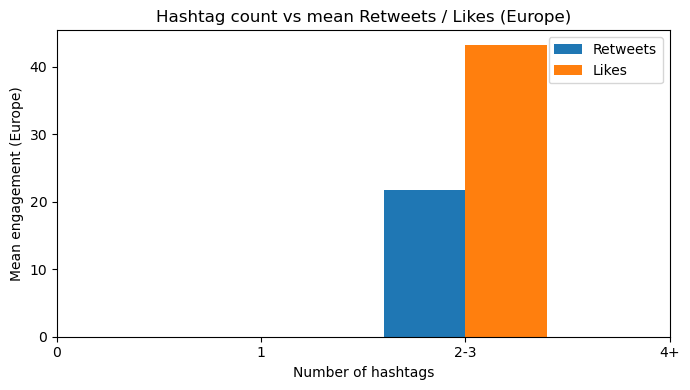

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# 用一份 copy，避免動到原來的 df_europe
tmp = df_europe.copy()

# 把 hashtag_count 分箱：0, 1, 2-3, 4+
bins = [-1, 0, 1, 3, 100]
labels = ["0", "1", "2-3", "4+"]
tmp["hashtag_bin"] = pd.cut(tmp["hashtag_count"], bins=bins, labels=labels)

grouped = (
    tmp.groupby("hashtag_bin")[["Retweets", "Likes"]]
       .mean()
       .reset_index()
)

print(grouped)

# 畫圖
x = range(len(grouped))
width = 0.4

plt.figure(figsize=(7,4))
plt.bar([i - width/2 for i in x], grouped["Retweets"], width=width, label="Retweets")
plt.bar([i + width/2 for i in x], grouped["Likes"],    width=width, label="Likes")

plt.xticks(list(x), grouped["hashtag_bin"].astype(str))
plt.xlabel("Number of hashtags")
plt.ylabel("Mean engagement (Europe)")
plt.title("Hashtag count vs mean Retweets / Likes (Europe)")
plt.legend()
plt.tight_layout()
plt.show()


Number of emojis vs. Average Retweets / Likes

Goal: To see if using more emojis in Europe helps with engagement.

  emoji_bin   Retweets      Likes
0         0        NaN        NaN
1         1  21.051471  41.985294
2        2+  22.827160  45.271605


/var/folders/s7/q7s5zs7x7xs6zxtqrzr8b8b40000gn/T/ipykernel_21391/1618778425.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp.groupby("emoji_bin")[["Retweets", "Likes"]]


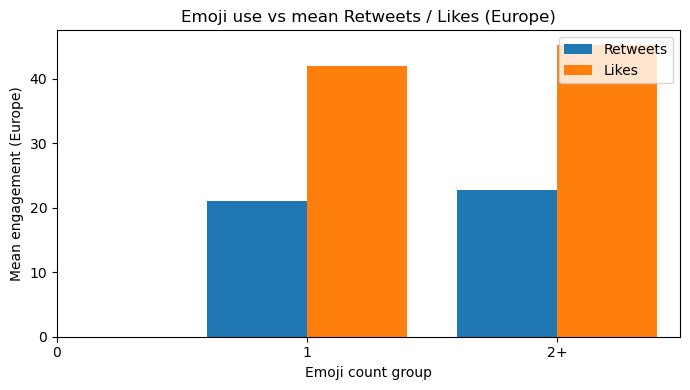

In [18]:
import matplotlib.pyplot as plt

tmp = df_europe.copy()

# 分箱：0, 1, 2+
bins = [-1, 0, 1, 100]
labels = ["0", "1", "2+"]
tmp["emoji_bin"] = pd.cut(tmp["emoji_count"], bins=bins, labels=labels)

grouped_emoji = (
    tmp.groupby("emoji_bin")[["Retweets", "Likes"]]
       .mean()
       .reset_index()
)

print(grouped_emoji)

x = range(len(grouped_emoji))
width = 0.4

plt.figure(figsize=(7,4))
plt.bar([i - width/2 for i in x], grouped_emoji["Retweets"], width=width, label="Retweets")
plt.bar([i + width/2 for i in x], grouped_emoji["Likes"],    width=width, label="Likes")

plt.xticks(list(x), grouped_emoji["emoji_bin"].astype(str))
plt.xlabel("Emoji count group")
plt.ylabel("Mean engagement (Europe)")
plt.title("Emoji use vs mean Retweets / Likes (Europe)")
plt.legend()
plt.tight_layout()
plt.show()


Europe: Which hashtags are truly "hot"? (Using raw data)

Objective: Using European data directly, calculate: the average number of retweets/likes for each hashtag, and select those with the most occurrences and highest average interaction.

Hashtag stats (Europe) head():
          hashtag_token  mean_retweets  mean_likes  count
0          #AbstractArt           18.0        35.0      1
1  #AcademicFrustration           19.0        38.0      1
2           #Acceptance           15.0        30.0      1
3       #Accomplishment           28.0        55.0      1
4        #AdeleMelodies           30.0        60.0      1

Top hashtags by mean Likes in Europe:
              hashtag_token  mean_retweets  mean_likes  count
223           #MusicalUnity           35.0        70.0      2
8         #AgedToPerfection           35.0        70.0      1
52               #Challenge           35.0        70.0      1
57      #ClassicFilmMoments           35.0        70.0      1
79         #CulinaryJourney           35.0        70.0      1
80         #CulinaryOdyssey           35.0        70.0      1
84         #CyclingChampion           35.0        70.0      1
86                #DIYGoals           35.0        70.0      1
113        #FantasyBookN

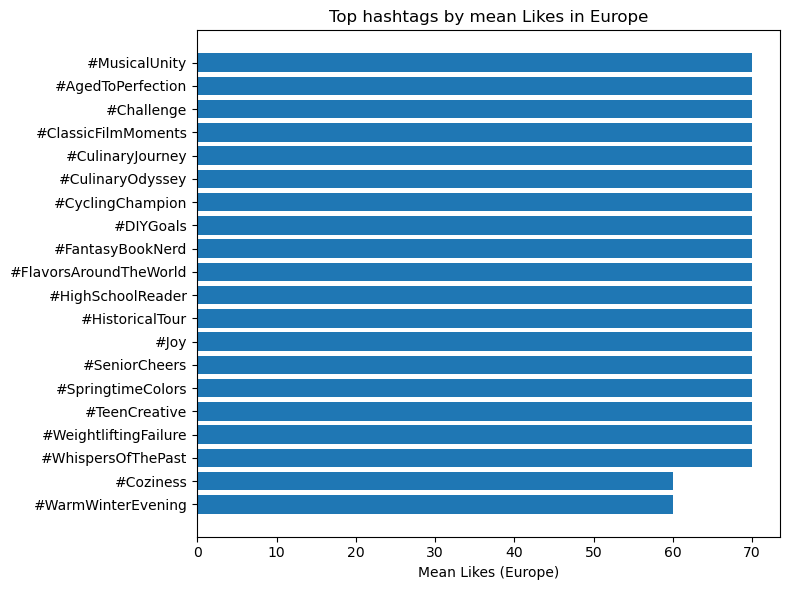

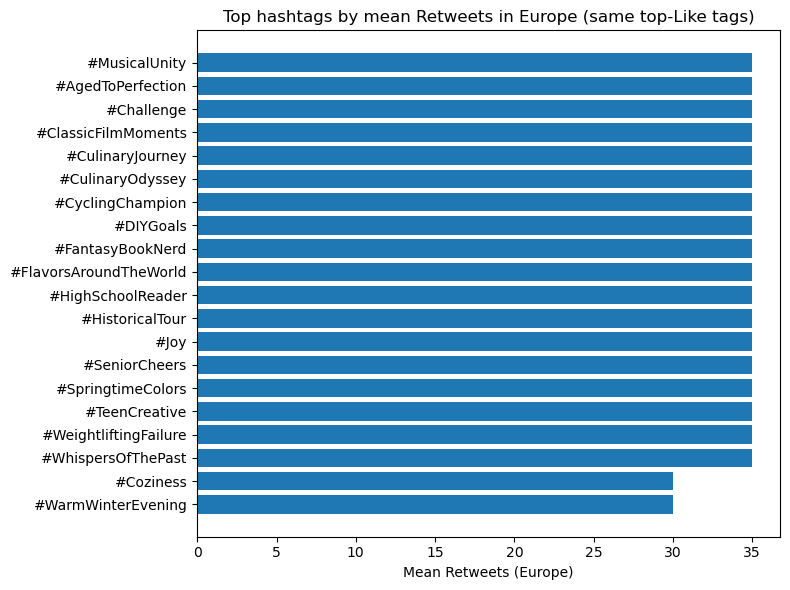

In [19]:
# Europe: Which hashtags are truly "hot"? (Using raw data, fixed version)

import pandas as pd
import matplotlib.pyplot as plt

tmp = df_europe.copy()

# 处理 Hashtags 字符串，避免 NaN
tmp["Hashtags"] = tmp["Hashtags"].fillna("").str.strip()

# 按空白切成 list，再 explode
tmp["hashtag_token"] = tmp["Hashtags"].str.split()
tmp = tmp.explode("hashtag_token")

# 去掉空字符串
tmp = tmp[tmp["hashtag_token"].notna() & (tmp["hashtag_token"] != "")]

# 如果欧洲子集里根本没有 hashtag，直接提示一下
if tmp.empty:
    print("No hashtags found in the European subset.")
else:
    # 按单个 hashtag 聚合
    tag_stats = (
        tmp.groupby("hashtag_token")
           .agg(
               mean_retweets = ("Retweets", "mean"),
               mean_likes    = ("Likes", "mean"),
               count         = ("Retweets", "size")
           )
           .reset_index()
    )

    print("Hashtag stats (Europe) head():")
    print(tag_stats.head())

    # 取“平均 Likes 最高”的前 20 个（如果行数小于 20 就全取）
    top_n = 20
    top_tags = (
        tag_stats
        .sort_values(["mean_likes", "count"], ascending=[False, False])
        .head(top_n)
    )

    print("\nTop hashtags by mean Likes in Europe:")
    print(top_tags)

    # --- 画 Likes 图 ---
    plt.figure(figsize=(8, 6))
    plt.barh(range(len(top_tags)), top_tags["mean_likes"])
    plt.yticks(range(len(top_tags)), top_tags["hashtag_token"])
    plt.gca().invert_yaxis()
    plt.xlabel("Mean Likes (Europe)")
    plt.title("Top hashtags by mean Likes in Europe")
    plt.tight_layout()
    plt.show()

    # --- 再画 Retweets 图（同一批 hashtag）---
    plt.figure(figsize=(8, 6))
    plt.barh(range(len(top_tags)), top_tags["mean_retweets"])
    plt.yticks(range(len(top_tags)), top_tags["hashtag_token"])
    plt.gca().invert_yaxis()
    plt.xlabel("Mean Retweets (Europe)")
    plt.title("Top hashtags by mean Retweets in Europe (same top-Like tags)")
    plt.tight_layout()
    plt.show()


Model Perspective: Focusing Only on "Hashtag Feature" Coefficients (European Logistic Model)

Your current coefficient graph mixes all features together.

The following section only captures tokens with the '#' symbol, which are highly likely to be hashtags. From a model coefficient perspective, let's see which hashtags will push up/pull down the coefficients.

Top hashtag features for high Retweets (Europe):
                          feature      coef
559          hashtags__excitement  0.717707
568         hashtags__inspiration  0.659377
620          hashtags__reflection  0.533564
517         hashtags__captivation  0.522363
613               hashtags__pride  0.509370
561          hashtags__familytime  0.505765
635         hashtags__schoolclubs  0.485790
683          hashtags__tenderness  0.478161
536         hashtags__contentment  0.472623
695   hashtags__warmwinterevening  0.438436
538            hashtags__coziness  0.438436
594          hashtags__movienight  0.391439
698   hashtags__whispersofthepast  0.389870
673       hashtags__surpriseparty  0.384726
611  hashtags__photographyjourney  0.379901


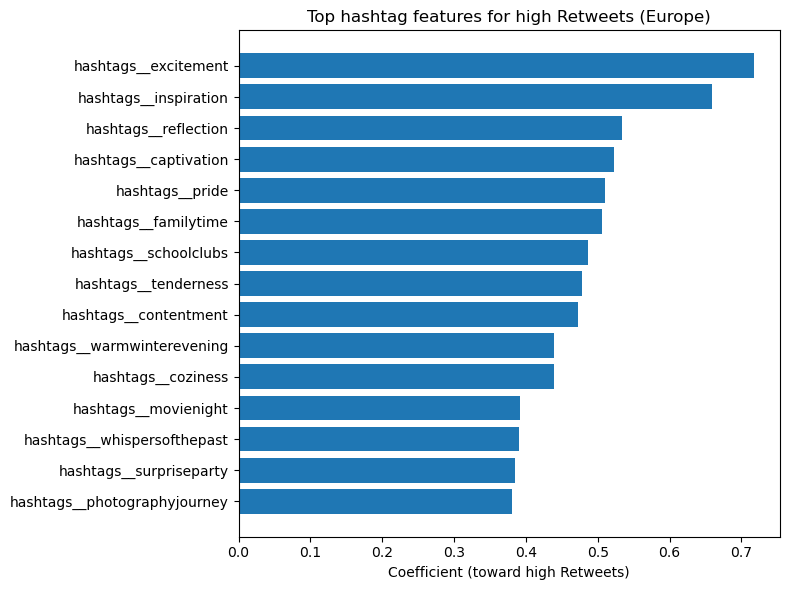


Hashtag features associated with LOW Retweets (Europe):
                         feature      coef
621             hashtags__regret -0.832753
558           hashtags__euphoria -0.799664
557            hashtags__disgust -0.684357
587         hashtags__melancholy -0.496549
646       hashtags__seniorclicks -0.483863
605      hashtags__outdoorbeauty -0.483863
626          hashtags__reverence -0.473403
580         hashtags__loneliness -0.446763
569           hashtags__inspired -0.407528
656     hashtags__shatteredhopes -0.387407
512            hashtags__anxiety -0.383532
636  hashtags__sciencefairwinner -0.370386
567       hashtags__indifference -0.356703
672  hashtags__surpriseadventure -0.346240
519        hashtags__celebration -0.344786


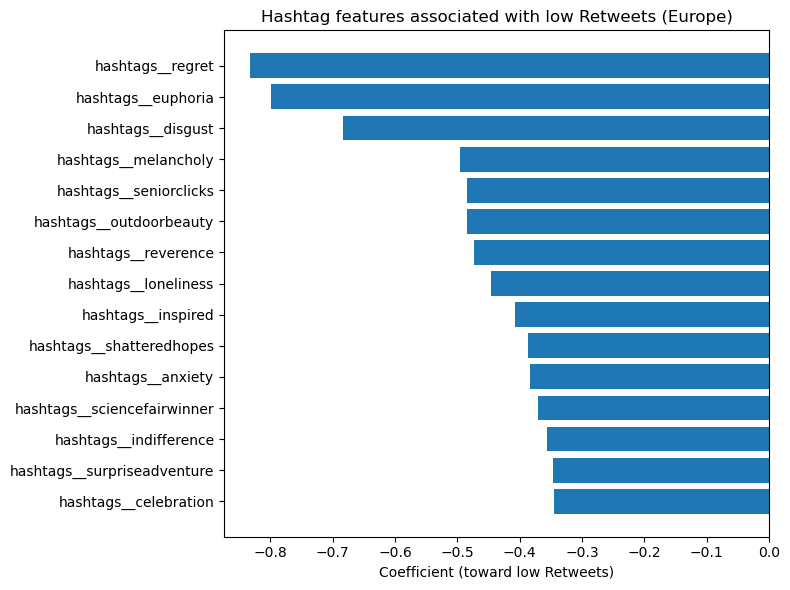


Top hashtag features for high Likes (Europe):
                         feature      coef
559         hashtags__excitement  0.743962
568        hashtags__inspiration  0.639765
620         hashtags__reflection  0.558330
613              hashtags__pride  0.533501
517        hashtags__captivation  0.528506
561         hashtags__familytime  0.520523
683         hashtags__tenderness  0.501005
536        hashtags__contentment  0.492715
635        hashtags__schoolclubs  0.485537
695  hashtags__warmwinterevening  0.418357
538           hashtags__coziness  0.418357
632         hashtags__rumormills  0.405171
637        hashtags__sciencegeek  0.400374
673      hashtags__surpriseparty  0.388708
627    hashtags__rippleofdespair  0.386804


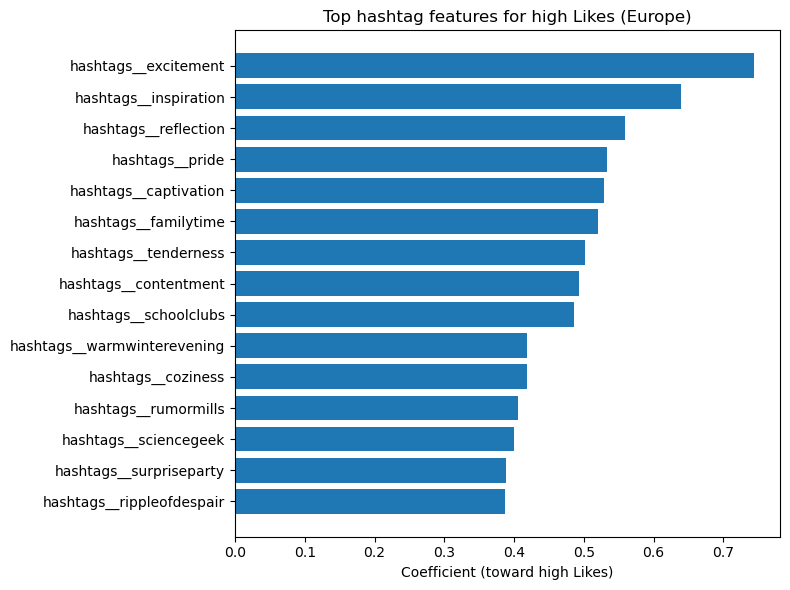


Hashtag features associated with LOW Likes (Europe):
                         feature      coef
621             hashtags__regret -0.841176
558           hashtags__euphoria -0.775511
557            hashtags__disgust -0.706979
587         hashtags__melancholy -0.509234
646       hashtags__seniorclicks -0.463199
605      hashtags__outdoorbeauty -0.463199
580         hashtags__loneliness -0.454604
626          hashtags__reverence -0.441219
656     hashtags__shatteredhopes -0.396073
512            hashtags__anxiety -0.385715
569           hashtags__inspired -0.365459
567       hashtags__indifference -0.365246
636  hashtags__sciencefairwinner -0.345207
623      hashtags__resentmentweb -0.344699
524  hashtags__cherishedmemories -0.343098


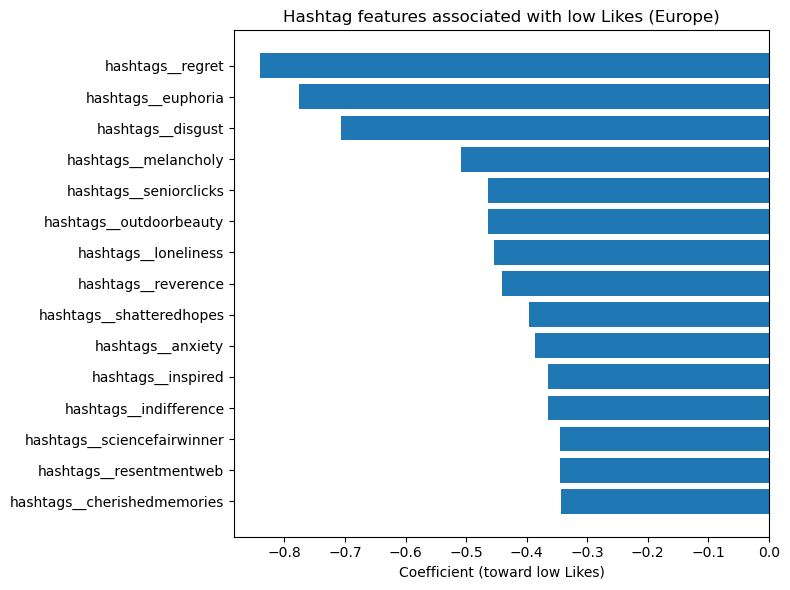

In [20]:
# Model Perspective: Focusing Only on "Hashtag" Features (fixed version)

import pandas as pd
import matplotlib.pyplot as plt

# 从 pipeline 里拿出已经 fit 好的 preprocessor
pp = log_reg_ret.named_steps["preprocess"]

# 这个会给出带前缀的完整特征名：比如 text__word, hashtags__word ...
all_feature_names = pp.get_feature_names_out()

# ===== Retweets 模型：提取 hashtag 特征 =====
coef_ret = log_reg_ret.named_steps["classifier"].coef_[0]
df_ret_all = pd.DataFrame({"feature": all_feature_names, "coef": coef_ret})

# 只保留以 "hashtags__" 开头的特征
hash_ret = df_ret_all[df_ret_all["feature"].str.startswith("hashtags__")]

if hash_ret.empty:
    print("No hashtag features found in Retweets model (check if Hashtags column is mostly empty).")
else:
    top_hash_ret = hash_ret.sort_values("coef", ascending=False).head(15)
    low_hash_ret = hash_ret.sort_values("coef", ascending=True).head(15)

    print("Top hashtag features for high Retweets (Europe):")
    print(top_hash_ret)

    plt.figure(figsize=(8, 6))
    plt.barh(range(len(top_hash_ret)), top_hash_ret["coef"])
    plt.yticks(range(len(top_hash_ret)), top_hash_ret["feature"])
    plt.gca().invert_yaxis()
    plt.xlabel("Coefficient (toward high Retweets)")
    plt.title("Top hashtag features for high Retweets (Europe)")
    plt.tight_layout()
    plt.show()

    print("\nHashtag features associated with LOW Retweets (Europe):")
    print(low_hash_ret)

    plt.figure(figsize=(8, 6))
    plt.barh(range(len(low_hash_ret)), low_hash_ret["coef"])
    plt.yticks(range(len(low_hash_ret)), low_hash_ret["feature"])
    plt.gca().invert_yaxis()
    plt.xlabel("Coefficient (toward low Retweets)")
    plt.title("Hashtag features associated with low Retweets (Europe)")
    plt.tight_layout()
    plt.show()

# ===== Likes 模型：同样做一次 =====
coef_like = log_reg_like.named_steps["classifier"].coef_[0]
df_like_all = pd.DataFrame({"feature": all_feature_names, "coef": coef_like})

hash_like = df_like_all[df_like_all["feature"].str.startswith("hashtags__")]

if hash_like.empty:
    print("No hashtag features found in Likes model (check if Hashtags column is mostly empty).")
else:
    top_hash_like = hash_like.sort_values("coef", ascending=False).head(15)
    low_hash_like = hash_like.sort_values("coef", ascending=True).head(15)

    print("\nTop hashtag features for high Likes (Europe):")
    print(top_hash_like)

    plt.figure(figsize=(8, 6))
    plt.barh(range(len(top_hash_like)), top_hash_like["coef"])
    plt.yticks(range(len(top_hash_like)), top_hash_like["feature"])
    plt.gca().invert_yaxis()
    plt.xlabel("Coefficient (toward high Likes)")
    plt.title("Top hashtag features for high Likes (Europe)")
    plt.tight_layout()
    plt.show()

    print("\nHashtag features associated with LOW Likes (Europe):")
    print(low_hash_like)

    plt.figure(figsize=(8, 6))
    plt.barh(range(len(low_hash_like)), low_hash_like["coef"])
    plt.yticks(range(len(low_hash_like)), low_hash_like["feature"])
    plt.gca().invert_yaxis()
    plt.xlabel("Coefficient (toward low Likes)")
    plt.title("Hashtag features associated with low Likes (Europe)")
    plt.tight_layout()
    plt.show()


Idea 1: Europe's "Golden Posting Time" – Time Slot × Platform × Engagement

Question: During what times and on which platforms do European users interact more frequently?

       HourGroup   Platform   Retweets      Likes
0     Night(0-5)   Facebook        NaN        NaN
1     Night(0-5)  Instagram        NaN        NaN
2     Night(0-5)    Twitter  18.000000  35.000000
3  Morning(6-11)   Facebook  20.900000  41.800000
4  Morning(6-11)  Instagram  17.454545  35.090909


/var/folders/s7/q7s5zs7x7xs6zxtqrzr8b8b40000gn/T/ipykernel_21391/3013913509.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = (tmp.groupby(["HourGroup", "Platform"])[["Retweets", "Likes"]]


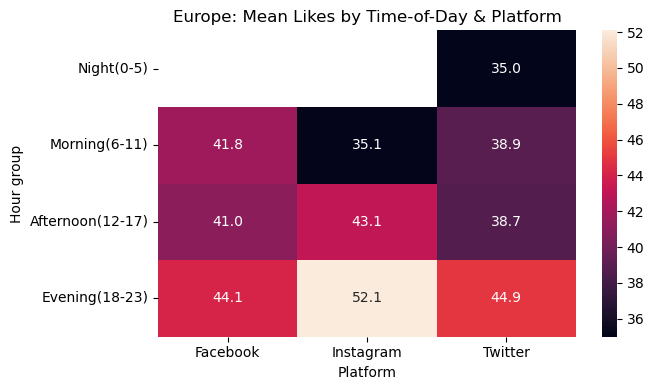

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

if "Hour" not in df_europe.columns:
    print("Column 'Hour' not found in df_europe, skip time-of-day analysis.")
else:
    tmp = df_europe.copy()

    # 按小时分成 4 个时段
    bins = [-1, 5, 11, 17, 23]
    labels = ["Night(0-5)", "Morning(6-11)", "Afternoon(12-17)", "Evening(18-23)"]
    tmp["HourGroup"] = pd.cut(tmp["Hour"], bins=bins, labels=labels)

    # 不同平台 & 时段下的平均 Likes / Retweets
    agg = (tmp.groupby(["HourGroup", "Platform"])[["Retweets", "Likes"]]
              .mean()
              .reset_index())

    print(agg.head())

    # 画 Likes 的 heatmap（Retweets 可以再画一张）
    pivot_likes = agg.pivot(index="HourGroup", columns="Platform", values="Likes")

    plt.figure(figsize=(7,4))
    sns.heatmap(pivot_likes, annot=True, fmt=".1f")
    plt.title("Europe: Mean Likes by Time-of-Day & Platform")
    plt.xlabel("Platform")
    plt.ylabel("Hour group")
    plt.tight_layout()
    plt.show()


Calculate the average interaction for different emotions

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# 先看一下有哪些 sentiment
print(df_europe["SentimentSimple"].value_counts())

# 计算每种情绪的平均 / 中位数 Likes 和 Retweets
sent_stats = (
    df_europe.groupby("SentimentSimple")
             .agg(
                 mean_retweets  = ("Retweets", "mean"),
                 median_retweets= ("Retweets", "median"),
                 mean_likes     = ("Likes", "mean"),
                 median_likes   = ("Likes", "median"),
                 n_posts        = ("Retweets", "size")
             )
             .reset_index()
)

print(sent_stats)


SentimentSimple
Negative    113
Positive     83
Neutral      21
Name: count, dtype: int64
  SentimentSimple  mean_retweets  median_retweets  mean_likes  median_likes  \
0        Negative      21.778761             22.0   43.442478          45.0   
1         Neutral      21.238095             22.0   42.238095          45.0   
2        Positive      21.746988             22.0   43.144578          44.0   

   n_posts  
0      113  
1       21  
2       83  


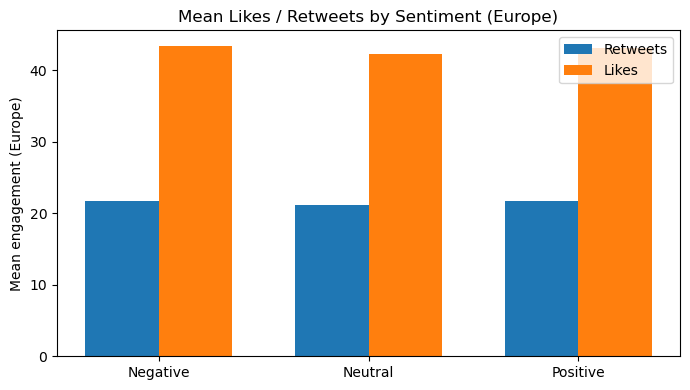

In [24]:
import numpy as np

# 按 sentiment 的顺序排一下，方便读
order = ["Negative", "Neutral", "Positive"]
sent_stats_ordered = sent_stats.set_index("SentimentSimple").loc[order].reset_index()

x = np.arange(len(sent_stats_ordered))  # 0,1,2
width = 0.35

plt.figure(figsize=(7,4))
plt.bar(x - width/2, sent_stats_ordered["mean_retweets"], width=width, label="Retweets")
plt.bar(x + width/2, sent_stats_ordered["mean_likes"],    width=width, label="Likes")

plt.xticks(x, sent_stats_ordered["SentimentSimple"])
plt.ylabel("Mean engagement (Europe)")
plt.title("Mean Likes / Retweets by Sentiment (Europe)")
plt.legend()
plt.tight_layout()
plt.show()



<Figure size 600x400 with 0 Axes>

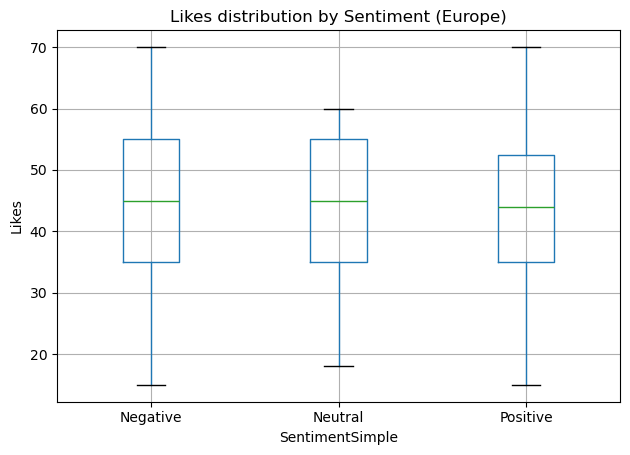

In [25]:
plt.figure(figsize=(6,4))
df_europe.boxplot(column="Likes", by="SentimentSimple")
plt.title("Likes distribution by Sentiment (Europe)")
plt.suptitle("")   # 去掉默认标题
plt.xlabel("SentimentSimple")
plt.ylabel("Likes")
plt.tight_layout()
plt.show()


Interactions across Sentiment and Platform/Text Length (Heatmap)

You've already looked at Sentiment and LengthGroup separately; now you can do some **cross-analysis**, such as:

Do positive/negative/neutral sentiments behave differently on different platforms?

Does the interaction rate vary significantly with a combination of "long text + negative sentiment"?

  SentimentSimple   Platform      Likes
0        Negative   Facebook  44.250000
1        Negative  Instagram  46.233333
2        Negative    Twitter  41.042553
3         Neutral   Facebook  36.200000
4         Neutral  Instagram  46.444444


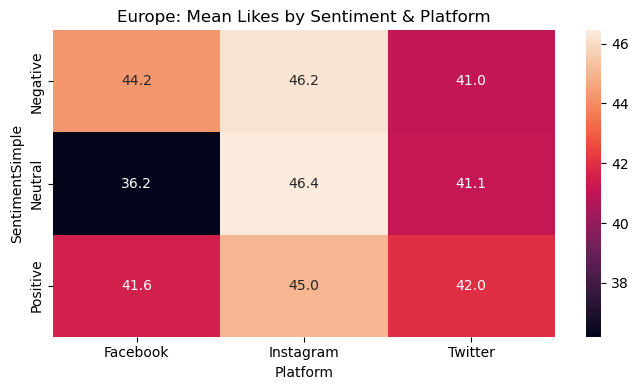

In [22]:
#Sentiment × Platform
import seaborn as sns
import matplotlib.pyplot as plt

tmp = df_europe.copy()

if "SentimentSimple" not in tmp.columns:
    print("Column 'SentimentSimple' not found.")
else:
    sent_plat = (tmp.groupby(["SentimentSimple","Platform"])[["Likes"]]
                   .mean()
                   .reset_index())

    print(sent_plat.head())

    pivot = sent_plat.pivot(index="SentimentSimple", columns="Platform", values="Likes")

    plt.figure(figsize=(7,4))
    sns.heatmap(pivot, annot=True, fmt=".1f")
    plt.title("Europe: Mean Likes by Sentiment & Platform")
    plt.xlabel("Platform")
    plt.ylabel("SentimentSimple")
    plt.tight_layout()
    plt.show()


  SentimentSimple LengthGroup      Likes
0        Negative     120-149  45.227273
1        Negative       30-59  26.111111
2        Negative       60-89  41.954545
3        Negative      90-119  42.409091
4         Neutral     120-149  54.000000


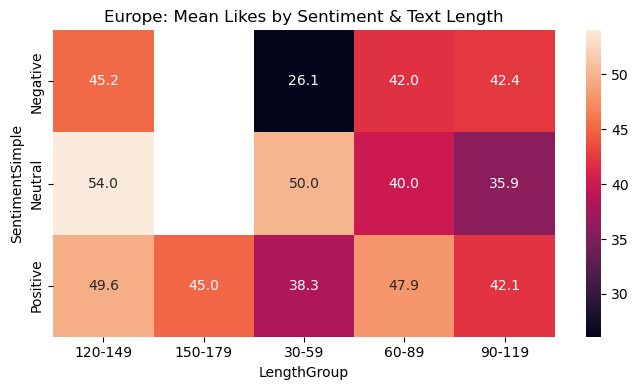

In [41]:
#Sentiment × LengthGroup
if "SentimentSimple" in df_europe.columns and "LengthGroup" in df_europe.columns:
    tmp = df_europe.copy()
    sent_len = (tmp.groupby(["SentimentSimple","LengthGroup"])[["Likes"]]
                  .mean()
                  .reset_index())

    print(sent_len.head())

    pivot2 = sent_len.pivot(index="SentimentSimple", columns="LengthGroup", values="Likes")

    plt.figure(figsize=(7,4))
    sns.heatmap(pivot2, annot=True, fmt=".1f")
    plt.title("Europe: Mean Likes by Sentiment & Text Length")
    plt.xlabel("LengthGroup")
    plt.ylabel("SentimentSimple")
    plt.tight_layout()
    plt.show()
else:
    print("Need both 'SentimentSimple' and 'LengthGroup' columns.")
